<a href="https://colab.research.google.com/github/shaheerzubery/Ml-basic-Programs/blob/main/Real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Real Estate data and Apply Machine Learning

In [ ]:
import pandas as pd
Real_estate = pd.read_csv("/content/real_estate.csv")
Real_estate.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
numeric_features = ["latitude", "longitude"]
Real_estate[numeric_features + ['price_per_unit']].describe()

,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000
mean,24.969030,121.533361,37.980193
std,0.012410,0.015347,13.606488
min,24.932070,121.473530,7.600000
25%,24.963000,121.528085,27.700000
50%,24.971100,121.538630,38.450000
75%,24.977455,121.543305,46.600000
max,25.014590,121.566270,117.500000


In [ ]:
categorical_data = ["house_age","transit_distance",	"local_convenience_stores"	]
Real_estate[categorical_data].describe()

,house_age,transit_distance,local_convenience_stores
count,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203
std,11.392485,1262.109595,2.945562
min,0.000000,23.382840,0.000000
25%,9.025000,289.324800,1.000000
50%,16.100000,492.231300,4.000000
75%,28.150000,1454.279000,6.000000
max,43.800000,6488.021000,10.000000


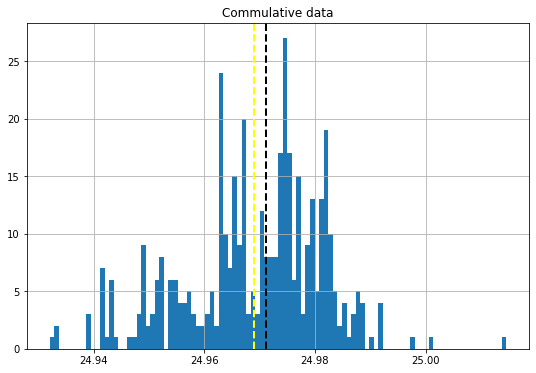

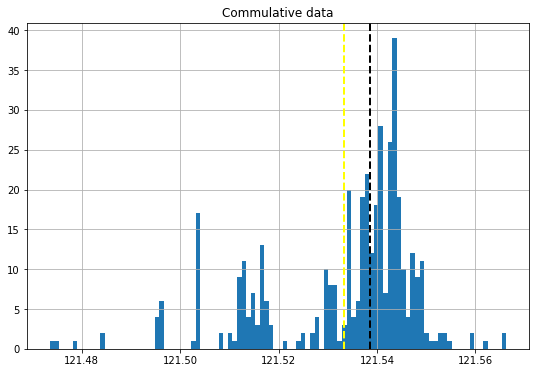

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline


for col in numeric_features:
    fig = plt.figure(figsize =(9,6) )
    ax = fig.gca()
    features = Real_estate[col]
    features.hist(ax = ax , bins = 100)
    ax.axvline(features.mean(), color="yellow", linestyle = "dashed", linewidth = 2)
    ax.axvline(features.median(), color = "black", linestyle = "dashed", linewidth = 2)
    ax.set_title("Commulative data")
plt.show()

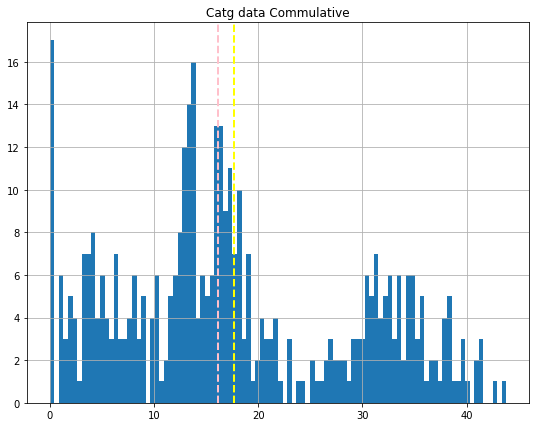

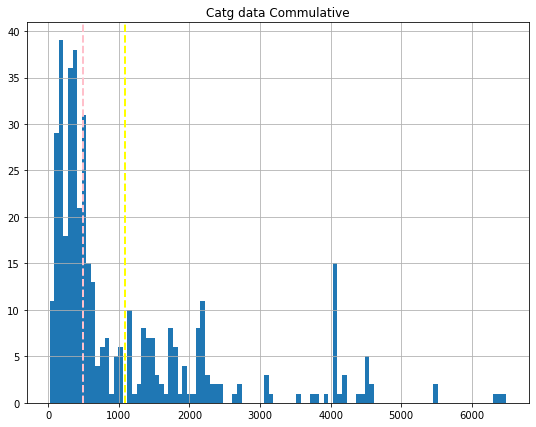

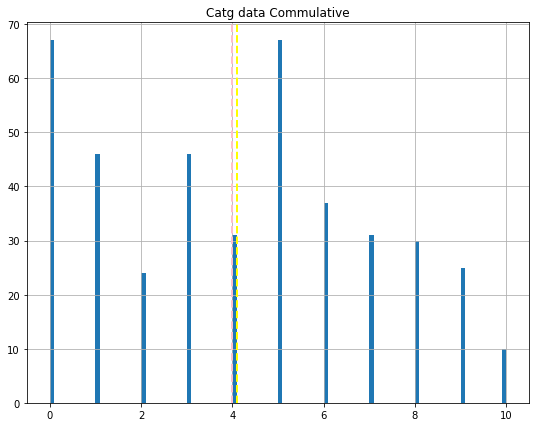

In [ ]:
for col in categorical_data:
    fig = plt.figure(figsize = (9,7))
    ax = fig.gca()
    features = Real_estate[col]
    features.hist(ax = ax, bins = 100)
    ax.axvline(features.mean(), color = "yellow", linestyle = "dashed", linewidth = 2)
    ax.axvline(features.median(), color = "pink", linestyle = "dashed", linewidth = 2)
    ax.set_title("Catg data Commulative")

plt.show()




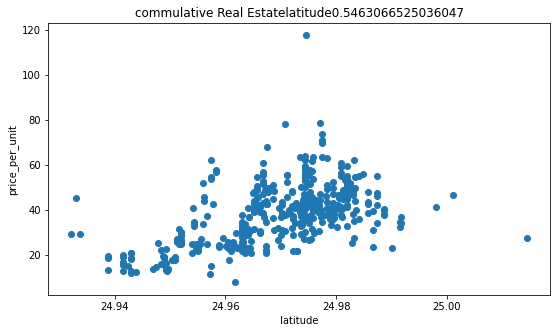

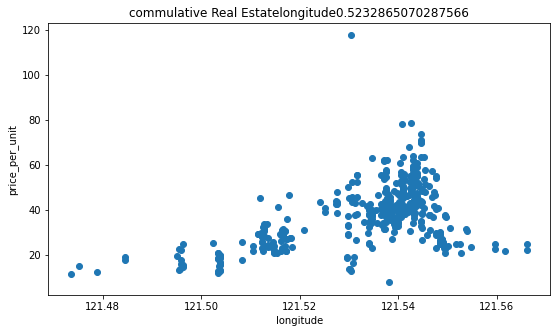

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize = (9,5))
    ax = fig.gca()
    feature = Real_estate[col]
    plt.xlabel(col)
    plt.ylabel('price_per_unit')
    label = Real_estate['price_per_unit']
    correlation = feature.corr(label)
    ax.set_title("commulative Real Estate" + col + str(correlation))
    
    

    plt.scatter(x = feature,y = label)
plt.show()



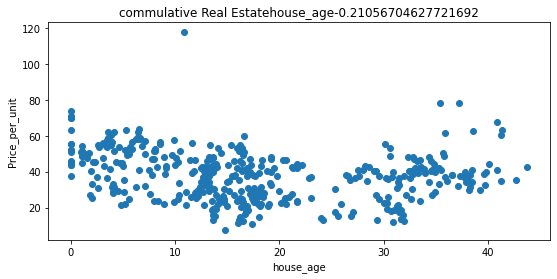

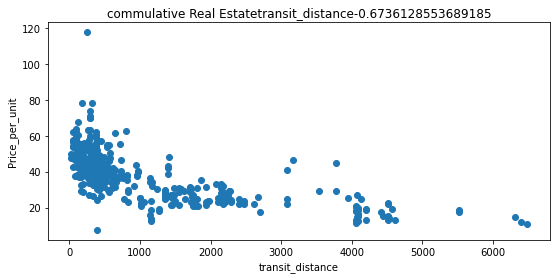

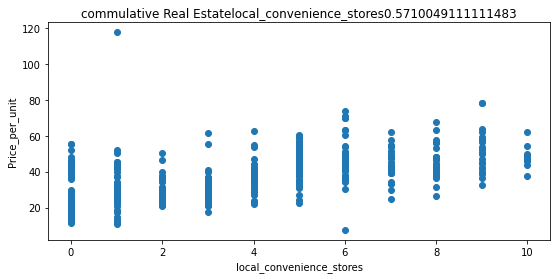

In [ ]:
for col in categorical_data:
    fig = plt.figure(figsize = (9,4))
    
    feature = Real_estate[col]
    ax = fig.gca()
    plt.xlabel(col)
    plt.ylabel("Price_per_unit")
    label = Real_estate["price_per_unit"]
    correlation = feature.corr(label)
    ax.set_title("commulative Real Estate" + col + str(correlation))
    plt.scatter(x = feature,y =label)
    
plt.show()

Apply Linear Rregression model


In [ ]:
#seperate label and features
x,y = Real_estate[['house_age','transit_distance','local_convenience_stores','latitude','longitude']].values,Real_estate['price_per_unit'].values
print("features:" , x[:10], "label: ", y[:10])

features: [[3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02]
 [1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02]
 [3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02]
 [2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02]
 [3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02]
 [1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02]] label:  [37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 0)
print("total train value", x_train.shape[0], "Total test value : ", x_test.shape[0])


total train value 331 Total test value :  83


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)
print(model)

LinearRegression()


predicted : [41. 12. 41. 12. 40. 40. 40. 34. 48. 45.]
Actual: [45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1]
mse: 62.17223562241522
rmse:  7.884937261793223
r2:  0.6420691483643883


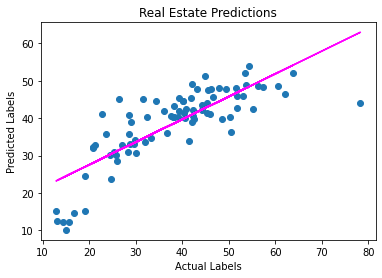

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

prediction = model.predict(x_test)
print("predicted :", np.round(prediction[:10]))
print("Actual:", y_test[:10])

mse = mean_squared_error(y_test,prediction)
print("mse:" , mse)

rmse = np.sqrt(mse)
print("rmse: ", rmse)


r2 = r2_score(y_test,prediction)
print("r2: ",r2)

plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Predictions')
# overlay the regression line
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor().fit(x_train,y_train)
print(model2)

DecisionTreeRegressor()


In [ ]:
predict = model2.predict(x_test)
print('prediction: ',np.round(predict[:10]))
print('actual: ', y_test[:10])

prediction:  [118.  22.  39.  22.  29.  37.  41.  35.  48.  42.]
actual:  [45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1]


In [ ]:
mse = mean_squared_error(y_test,predict)
print("mse:" , mse)

rmse = np.sqrt(mse)
print("rmse: ", rmse)


r2 = r2_score(y_test,predict)
print("r2: ",r2)

mse: 141.30370565595717
rmse:  11.88712352320599
r2:  0.18650254091120644


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor().fit(x_train,y_train)
print(model3)


RandomForestRegressor()


In [ ]:
predict_random = model3.predict(x_test)
print("prediction: ", np.round(predict_random[:10]))
print("actual:", y_test[:10])

prediction:  [69. 19. 47. 21. 31. 41. 48. 37. 56. 43.]
actual: [45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1]


In [ ]:
mse = mean_squared_error(y_test,predict_random)
print("mse:" , mse)

rmse = np.sqrt(mse)
print("rmse: ", rmse)


r2 = r2_score(y_test,predict_random)
print("r2: ",r2)

mse: 55.19172317887256
rmse:  7.429113216183514
r2:  0.6822565525771684


In [ ]:
from sklearn.linear_model import Lasso
model4 = Lasso().fit(x_train,y_train)
print(model4)

Lasso()


In [ ]:
predict_laso = model4.predict(x_test)
print("prediction: ", np.round(predict_laso[:10]))
print("actual:", y_test[:10])

prediction:  [42. 13. 40. 12. 41. 41. 42. 35. 47. 43.]
actual: [45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1]


In [ ]:
mse = mean_squared_error(y_test,predict_laso)
print("mse:" , mse)

rmse = np.sqrt(mse)
print("rmse: ", rmse)


r2 = r2_score(y_test,predict_laso)
print("r2: ",r2)

mse: 66.32482280717772
rmse:  8.144005329515553
r2:  0.6181623505364959


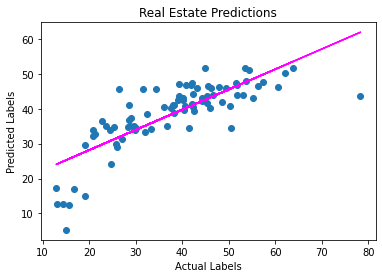

In [ ]:
plt.scatter(y_test, predict_laso)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Predictions')
# overlay the regression line
z = np.polyfit(y_test, predict_laso, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Pipline**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(x_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2])])),
                ('regressor', LinearRegression())])


In [ ]:
predictions_linear = model.predict(x_test)
print('prediction:', np.round(predictions_linear[:10]))
print("actual:", y_test[:10])
mse = mean_squared_error(y_test, predictions_linear)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_linear)
print("R2:", r2)

prediction: [36. 20. 46. 21. 36. 46. 40. 33. 46. 54.]
actual: [45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1]
MSE: 68.98467843175332
RMSE: 8.305701561683597
R2: 0.602849335339261


In [ ]:
import joblib
filename = './Real_estate.pkl'
joblib.dump(model,filename)

['./Real_estate.pkl']

In [ ]:
loaded_model = joblib.load(filename)

x_new = np.array([[32,84.87882,10,24.98298,121.54024]]).astype("float64")

print('X_new: {}'.format(list(x_new[0])))
result = loaded_model.predict(x_new)
print('prediction:{}'.format(np.round(result[0])))
print("x_new : ", list(x_new[0]))
print('prediction: ', np.round(result[0]))

X_new: [32.0, 84.87882, 10.0, 24.98298, 121.54024]
prediction:38.0
x_new :  [32.0, 84.87882, 10.0, 24.98298, 121.54024]
prediction:  38.0


In [ ]:
loaded_model = joblib.load(filename)

x_new = np.array([[0,292.9978,6,24.97744,121.54024]]).astype("float64")

print('X_new: {}'.format(list(x_new[0])))
result = loaded_model.predict(x_new)
print('prediction:{}'.format(np.round(result[0])))



X_new: [0.0, 292.9978, 6.0, 24.97744, 121.54024]
prediction:69.0
